# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [2]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [3]:
pokemon = pd.DataFrame(raw_data)

### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [4]:
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [5]:
pokemon = pokemon.loc[:,['name',  'type', 'hp','evolution', 'pokedex']]

In [6]:
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [7]:
pokemon['place'] = ['lakes', 'parks', 'hills', 'forest']

### 6. Display the data type of each column

In [8]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

### 7. Display the info of dataframe

In [9]:
round(pokemon.describe(),2)

,hp
count,4.00
mean,43.25
std,2.87
min,39.00
25%,42.75
50%,44.50
75%,45.00
max,45.00


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [10]:
wine = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/wine.txt')

### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [11]:
#pd.Series(wine.columns)

In [12]:
wine.drop(columns=['1','2.43','2.8','.28','5.64','3.92','1065'] ,axis=1,inplace=True)

### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [13]:
wine.rename(columns = {'14.23':'alcohol', '1.71':'malic_acid', '15.6':'alcalinity_of_ash', '127':'magnesium', '3.06':'flavanoids', '2.29':'proanthocyanins', '1.04':'hue'}, inplace=True)

In [14]:
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,1.05
1,13.16,2.36,18.6,101,3.24,2.81,1.03
2,14.37,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05


### 11. Set the values of the first 3 values from alcohol column as NaN

In [15]:
wine.loc[wine.index[:3], 'alcohol'] = np.nan

### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [16]:
wine.loc[wine.index[2:4], 'magnesium'] = np.nan

### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [17]:
wine['alcohol']=wine['alcohol'].replace(np.nan, 10)
wine['magnesium']=wine['magnesium'].replace(np.nan, 100)

### 14. Count the number of missing values in all columns.

In [18]:
wine.isna().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [19]:
rand_num = np.random.randint(1,10,10)

In [20]:
rand_num

array([5, 8, 7, 5, 9, 8, 5, 8, 6, 9])

In [21]:
ran_num = [5, 8, 7, 5, 9, 8, 5, 8, 6, 9]

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [22]:
wine.loc[wine.index[[5, 8, 7, 5, 9, 8, 5, 8, 6, 9]],'alcohol'] = np.nan

### 17.  How many missing values do we have now?

In [23]:
wine.isna().sum()

alcohol              5
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 18. Print only the non-null values in alcohol

In [24]:
wine.alcohol[wine.alcohol.notnull()]

0      10.00
1      10.00
2      10.00
3      13.24
4      14.20
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 172, dtype: float64

### 19. Delete the rows that contain missing values

In [25]:
wine = wine.dropna()

### 20.  Reset the index, so it starts with 0 again

In [26]:
wine = wine.reset_index()

## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [27]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')

### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [28]:
chipo.item_price = chipo.item_price.str.replace('$','')

In [29]:
chipo.item_price = chipo.item_price.str.replace('$','').astype('float')

In [30]:
chipo[chipo['item_price'] > 10].count()

order_id              1130
quantity              1130
item_name             1130
choice_description    1123
item_price            1130
dtype: int64

### 22. Print the Chipo Dataframe & info about data frame

In [31]:
print(chipo.info())
chipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

- **Delete the duplicates in item_name and quantity**

In [32]:
chipo1 = chipo.loc[-((chipo.item_name.duplicated()) & (chipo.quantity.duplicated())),:]
chipo1

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
10,5,1,Chips and Guacamole,NaN,4.45
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75


- **Print a data frame with only two columns `item_name` and `item_price`**

In [33]:
chipo1.loc[:,['item_name','item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
6,Side of Chips,1.69
7,Steak Burrito,11.75
8,Steak Soft Tacos,9.25
10,Chips and Guacamole,4.45
11,Chicken Crispy Tacos,8.75


- **Sort the values from the most to less expensive**

In [34]:
chipo1.sort_values(by='item_price',ascending=False)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
4152,1660,10,Bottled Water,NaN,15.00
3887,1559,8,Side of Chips,NaN,13.52
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89


### 24. Sort by the name of the item

In [35]:
chipo1.sort_values(by='item_name',ascending=True)

,order_id,quantity,item_name,choice_description,item_price
298,129,1,6 Pack Soft Drink,[Sprite],6.49
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89
56,26,1,Barbacoa Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Black...",9.25
4152,1660,10,Bottled Water,NaN,15.00
3599,1443,7,Bottled Water,NaN,10.50
2441,970,5,Bottled Water,NaN,7.50
34,17,1,Bottled Water,NaN,1.09


### 25. What was the quantity of the most expensive item ordered?

In [36]:
chipo.loc[(chipo.item_price == chipo.item_price.max()),['item_price','quantity']]

,item_price,quantity
3598,44.25,15


### 26. How many times were a Veggie Salad Bowl ordered?

In [37]:
Veggie_Salad_Bowl = len(chipo[chipo.item_name == 'Veggie Salad Bowl'])

In [38]:
print('Veggie Salad Bowl were ordered {} times'.format(Veggie_Salad_Bowl))

Veggie Salad Bowl were ordered 18 times


### 27. How many times people orderd more than one Canned Soda?

In [39]:
one_Canned_Soda = len(chipo[(chipo.item_name == 'Canned Soda') & (chipo.quantity > 1)])

In [40]:
print('one Canned Soda were ordered {} times'.format(one_Canned_Soda))

one Canned Soda were ordered 20 times


## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [41]:
users = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/occupation.csv',sep = '|')

### 29. Discover what is the mean age per occupation

In [42]:
users.groupby(['occupation'])[['age']].mean().add_prefix('mean_')

,mean_age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [43]:
from numpy import where as IF

In [44]:
users.gender = IF(users.gender == 'M',1,2)

In [45]:
x = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

sums = x[[1, 2]].sum(axis=1)
male_ratio = 100 * x[1] / sums 

round(male_ratio,2)

occupation
administrator     54.43
artist            53.57
doctor           100.00
educator          72.63
engineer          97.01
entertainment     88.89
executive         90.62
healthcare        31.25
homemaker         14.29
lawyer            83.33
librarian         43.14
marketing         61.54
none              55.56
other             65.71
programmer        90.91
retired           92.86
salesman          75.00
scientist         90.32
student           69.39
technician        96.30
writer            57.78
dtype: float64

### 31. For each occupation, calculate the minimum and maximum ages

In [46]:
users.groupby(['occupation']).agg({'age':[np.min,np.max]})

age     
              amin amax
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60

### 32. For each combination of occupation and gender, calculate the mean age

In [47]:
users.groupby(['occupation','gender']).agg({'age':[np.mean]})

age
                           mean
occupation    gender           
administrator 1       37.162791
              2       40.638889
artist        1       32.333333
              2       30.307692
doctor        1       43.571429
educator      1       43.101449
              2       39.115385
engineer      1       36.600000
              2       29.500000
entertainment 1       29.000000
              2       31.000000
executive     1       38.172414
              2       44.000000
healthcare    1       45.400000
              2       39.818182
homemaker     1       23.000000
              2       34.166667
lawyer        1       36.200000
              2       39.500000
librarian     1       40.000000
              2       40.000000
marketing     1       37.875000
              2       37.200000
none          1       18.600000
              2       36.500000
other         1       34.028986
              2       35.472222
programmer    1       33.216667
              2       32.166667
retired       1       62.538462
              2       70.000000
salesman      1       38.555556
              2       27.000000
scientist     1       36.321429
              2       28.333333
student       1       22.669118
              2       20.750000
technician    1       32.961538
              2       38.000000
writer        1       35.346154
              2       37.631579

### 33.  For each occupation present the percentage of women and men

In [48]:
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg({'gender':'count'})

occup_gender = (gender_ocup/occup_count) * 100

occup_gender

gender
occupation    gender            
administrator 1        54.430380
              2        45.569620
artist        1        53.571429
              2        46.428571
doctor        1       100.000000
educator      1        72.631579
              2        27.368421
engineer      1        97.014925
              2         2.985075
entertainment 1        88.888889
              2        11.111111
executive     1        90.625000
              2         9.375000
healthcare    1        31.250000
              2        68.750000
homemaker     1        14.285714
              2        85.714286
lawyer        1        83.333333
              2        16.666667
librarian     1        43.137255
              2        56.862745
marketing     1        61.538462
              2        38.461538
none          1        55.555556
              2        44.444444
other         1        65.714286
              2        34.285714
programmer    1        90.909091
              2         9.090909
retired       1        92.857143
              2         7.142857
salesman      1        75.000000
              2        25.000000
scientist     1        90.322581
              2         9.677419
student       1        69.387755
              2        30.612245
technician    1        96.296296
              2         3.703704
writer        1        57.777778
              2        42.222222

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [49]:
student_mat = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/student-mat.csv')
student_por = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/student-por.csv')

df = pd.concat([student_mat,student_por],axis=0).reset_index(drop=True)

### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [50]:
#pd.Series(df.columns)
df = df.iloc[:,0:12]

### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [51]:
capitalize = lambda string: string.capitalize()

In [52]:
capitalize('at_home')

'At_home'

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [53]:
print(df['Mjob'].apply(capitalize))
print(df['Fjob'].apply(capitalize))

0        At_home
1        At_home
2        At_home
3         Health
4          Other
          ...   
1039    Services
1040     Teacher
1041       Other
1042    Services
1043    Services
Name: Mjob, Length: 1044, dtype: object
0        Teacher
1          Other
2          Other
3       Services
4          Other
          ...   
1039       Other
1040    Services
1041       Other
1042    Services
1043       Other
Name: Fjob, Length: 1044, dtype: object


### 38. Print the last elements of the data set. (Last few records)

In [54]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother
1043,MS,M,18,R,LE3,T,3,2,services,other,course,mother


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [55]:
df['Mjob'] = df['Mjob'].apply(capitalize)
df['Fjob'] = df['Fjob'].apply(capitalize)

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [56]:
df['legal_drinker'] = np.where(df['age'] >= 18,True,False)

### 41. Multiply every number of the dataset by 10. 

In [57]:
df1 = df[df.select_dtypes(include=['number']).columns]*10

In [58]:
df[df1.columns] = df1

## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [59]:
cars1 = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/cars1.csv')
cars2 = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/cars2.csv')

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [60]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [61]:
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [62]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [63]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [64]:
cars1.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

In [65]:
cars1.index

RangeIndex(start=0, stop=198, step=1)

In [66]:
cars1.shape

(198, 14)

In [67]:
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [68]:
cars1.size

2772

In [69]:
cars1.ndim

2

In [70]:
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [71]:
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [72]:
cars1.memory_usage()

Index            128
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [73]:
cars1.sort_values(by='cylinders')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
111,18.0,3,70,90,2124,13.5,73,3,maxda rx3,NaN,NaN,NaN,NaN,NaN
71,19.0,3,70,97,2330,13.5,72,3,mazda rx2 coupe,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN
141,29.0,4,98,83,2219,16.5,74,2,audi fox,NaN,NaN,NaN,NaN,NaN
142,26.0,4,79,67,1963,15.5,74,2,volkswagen dasher,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,16.0,8,302,140,4141,14.0,74,1,ford gran torino,NaN,NaN,NaN,NaN,NaN
72,15.0,8,304,150,3892,12.5,72,1,amc matador (sw),NaN,NaN,NaN,NaN,NaN
73,13.0,8,307,130,4098,14.0,72,1,chevrolet chevelle concours (sw),NaN,NaN,NaN,NaN,NaN
75,14.0,8,318,150,4077,14.0,72,1,plymouth satellite custom (sw),NaN,NaN,NaN,NaN,NaN


### pandas_profiling

In [74]:
import pandas_profiling

In [75]:
profile_report = pandas_profiling.ProfileReport(cars1)

In [76]:
profile_report.to_file('profile_report.html')

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [77]:
cars1.drop(columns = ['Unnamed: 9', 'Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace=True)

### 45. What is the number of observations in each dataset?

In [78]:
print(cars1.count())
print('===================')
print(cars2.count())

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
dtype: int64
mpg             200
cylinders       200
displacement    200
horsepower      200
weight          200
acceleration    200
model           200
origin          200
car             200
dtype: int64


### 46. Join cars1 and cars2 into a single DataFrame called cars

In [79]:
cars = pd.concat([cars1,cars2],axis=0).reset_index()

### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [80]:
owners = pd.Series(np.random.randint(15000,73000,cars.shape[0]))

### 48. Add the column owners to cars

In [81]:
cars['owners'] = owners

## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [82]:
# Current date and time
dt.date.today()

datetime.date(2021, 4, 29)

In [83]:
# Current year
dt.datetime.now().year

2021

In [84]:
# Month of year
dt.datetime.now().month

4

In [85]:
# Week number of the year
dt.date.today().isocalendar()[1]

17

In [86]:
# Weekday of the week
dt.date.today().isocalendar()[2]

4

In [87]:
# Day of year
dt.datetime.now().timetuple().tm_yday

119

In [88]:
# Day of the month
dt.date.today().strftime("%d")

'29'

In [89]:
# Day of week
dt.date.today().weekday()

3

### 50. Write a Python program to convert a string to datetime.
Sample String : Jan 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [90]:
pd.to_datetime('Jan 1 2014 2:43PM')

Timestamp('2014-01-01 14:43:00')

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [91]:
(dt.date(2015,6,22)) - (dt.timedelta(5))

datetime.date(2015, 6, 17)

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [92]:
dt.datetime.fromtimestamp(int("1284105682")).strftime('%Y-%m-%d %H:%M:%S')

'2010-09-10 13:31:22'

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [93]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
DoB2 = pd.to_datetime(DoB,format='%d%b%y')
DoB2

0   2059-09-07
1   2055-01-01
2   2047-12-15
3   2042-07-11
dtype: datetime64[ns]

In [94]:
l0 = []
for i in DoB2:
    if i.year > 2000:
        res = i.replace(year = i.year-100)
    l0.append(res)
DoB2 = pd.Series(l0)

DoB2

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [95]:
from datetime import date
f_date = date(2014, 7, 2)
l_date = date(2014, 9, 11)
delta = l_date - f_date
print(delta.days)

71


### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [96]:
pd.to_datetime('15Dec1989').strftime("%A, %d %b %y")

'Friday, 15 Dec 89'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [97]:
data = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/wind.data')

In [98]:
data['Yr_Mo_Dy'] = pd.to_datetime((data.Yr*10000+data.Mo*100+data.Dy),format='%y%m%d')

In [99]:
data.drop(columns=['Yr', 'Mo', 'Dy'], axis=1,inplace=True)

In [100]:
data = data.loc[:,['Yr_Mo_Dy','RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO','BEL', 'MAL']]

### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [101]:
l0 = []
for i in data.Yr_Mo_Dy:
    if i.year < 2000:
        res = i.replace(year = i.year-0)
    elif i.year > 2000:
        res = i.replace(year = i.year-100)
    l0.append(res)
date = pd.Series(l0)

In [102]:
data.Yr_Mo_Dy = date

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [103]:
data.set_index('Yr_Mo_Dy',inplace=True)

### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [104]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 60. Compute how many non-missing values there are in total.

In [105]:
data.count()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [106]:
round(data.mean().mean(),2)

10.23

In [107]:
Mean = data[data.select_dtypes(include=['number']).columns].mean()
round(Mean.mean(),2)

10.23

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [108]:
#data.describe().T.loc[:,['min','max','mean','std']]

loc_stats = pd.DataFrame()
loc_stats['min'] = data[data.select_dtypes(include=['number']).columns].min()
loc_stats['max'] = data[data.select_dtypes(include=['number']).columns].max()
loc_stats['mean'] = round(data[data.select_dtypes(include=['number']).columns].mean(),2)
loc_stats['std'] = round(data[data.select_dtypes(include=['number']).columns].std(),2)

loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.36,5.62
VAL,0.21,33.37,10.64,5.27
ROS,1.50,33.84,11.66,5.01
KIL,0.00,28.46,6.31,3.61
SHA,0.13,37.54,10.46,4.94
BIR,0.00,26.16,7.09,3.97
DUB,0.00,30.37,9.80,4.98
CLA,0.00,31.08,8.50,4.50
MUL,0.00,25.88,8.49,4.17
CLO,0.04,28.21,8.71,4.50


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [109]:
day_stats = pd.DataFrame()

day_stats['min'] = data[data.select_dtypes(include=['number']).columns].min(axis = 1)
day_stats['max'] = data[data.select_dtypes(include=['number']).columns].max(axis = 1)
day_stats['mean'] = data[data.select_dtypes(include=['number']).columns].mean(axis = 1)
day_stats['std'] = data[data.select_dtypes(include=['number']).columns].std(axis = 1)

day_stats.head(30)

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
1961-01-09,4.75,15.37,9.897500,2.905954


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [110]:
data['date'] = data.index

data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)
data['day'] = data['date'].apply(lambda date: date.day)

january_winds = data.query('month == 1')
january_winds.loc[:,'RPT':"MAL"].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [111]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [112]:
week_stats = pd.DataFrame()

week_stats['min'] = data[data.select_dtypes(include=['number']).columns].min(axis = 1)
week_stats['max'] = data[data.select_dtypes(include=['number']).columns].max(axis = 1)
week_stats['mean'] = data[data.select_dtypes(include=['number']).columns].mean(axis = 1)
week_stats['std'] = data[data.select_dtypes(include=['number']).columns].std(axis = 1)

In [113]:
week_stats.drop( week_stats.loc[week_stats.index == '1961-01-01',:].index,inplace=True)

In [114]:
week_stats = week_stats.groupby(by=pd.Grouper(freq='w')).max()

In [115]:
week_stats.head(52)

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-08,1.00,1961.0,149.504286,521.493581
1961-01-15,1.00,1961.0,142.419333,505.185004
1961-01-22,1.00,1961.0,153.487857,520.265346
1961-01-29,1.00,1961.0,159.519286,518.542673
1961-02-05,2.00,1961.0,144.013333,504.332479
1961-02-12,2.00,1961.0,147.519333,503.206090
1961-02-19,2.00,1961.0,153.485000,520.275580
1961-02-26,2.00,1961.0,149.168000,504.487510
1961-03-05,3.00,1961.0,160.285385,541.069975


## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [116]:
apple = pd.read_csv("D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/appl_1980_2014.csv")

### 68.  Check out the type of the columns

In [117]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [118]:
apple.Date = pd.to_datetime(apple.Date)

### 70.  Set the date as the index

In [119]:
apple = apple.set_index('Date')

### 71.  Is there any duplicate dates?

In [120]:
dup_dates = apple.index.duplicated().sum()

In [121]:
print('Number of duplicate dates is {} in data.'.format(dup_dates))

Number of duplicate dates is 0 in data.


### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [122]:
apple = apple.sort_index()

### 73. Get the last business day of each month

In [123]:
apple['Date'] = apple.index

apple['month'] = apple['Date'].apply(lambda date: date.month)
apple['year'] = apple['Date'].apply(lambda date: date.year)
apple['day'] = apple['Date'].apply(lambda date: date.day)

In [124]:
apple.groupby(by=pd.Grouper(freq='m')).max()

,Open,High,Low,Close,Volume,Adj Close,Date,month,year,day
Date,,,,,,,,,,
1980-12-31,36.00,36.13,36.00,36.00,117258400,0.56,1980-12-31,12,1980,31
1981-01-31,34.50,34.75,34.50,34.50,13921600,0.54,1981-01-30,1,1981,30
1981-02-28,28.75,28.87,28.75,28.75,6966400,0.45,1981-02-27,2,1981,27
1981-03-31,26.75,27.00,26.75,26.75,57825600,0.42,1981-03-31,3,1981,31
1981-04-30,29.25,29.37,29.25,29.25,14504000,0.46,1981-04-30,4,1981,30
...,...,...,...,...,...,...,...,...,...,...
2014-03-31,546.52,549.00,539.59,544.99,93511600,77.42,2014-03-31,3,2014,31
2014-04-30,593.74,599.43,589.80,594.09,189977900,84.40,2014-04-30,4,2014,30
2014-05-31,637.98,644.17,628.90,635.38,141005200,90.77,2014-05-30,5,2014,30


### 74.  What is the difference in days between the first day and the oldest

In [125]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### 75.  How many months in the data we have?

In [126]:
# Run the following code
#apple_month = apple.resample('BM').max()
#apple_month

In [127]:
no_months = apple.groupby(by=pd.Grouper(freq='m')).max()

In [128]:
print("Total number of months in the data are ",len(no_months))

Total number of months in the data are  404


## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [129]:
apple.rename(columns={'Adj Close': 'AdjClose'},inplace=True)

<AxesSubplot:xlabel='Date'>

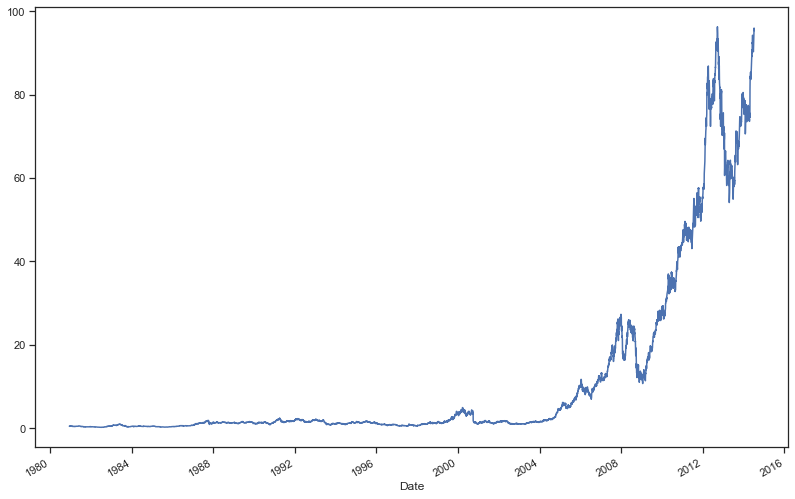

In [130]:
apple.AdjClose.plot(figsize=(13.5,9))

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [131]:
online_rt = pd.read_csv("D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/Online_Retail.csv",encoding = "ISO-8859-1")

### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

In [132]:
top10 = online_rt.groupby(['Country'])[['Quantity']].sum().sort_values(by= 'Quantity',ascending=False).reset_index()
top10 = top10[top10.Country!='United Kingdom'].head(10)
top10 = top10.set_index('Country')

<AxesSubplot:xlabel='Country'>

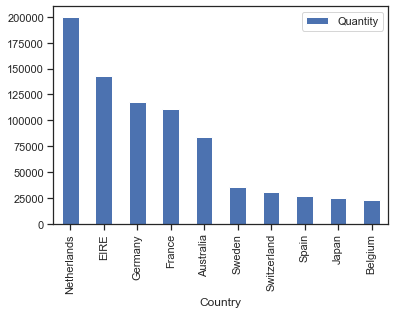

In [133]:
top10.plot(kind= 'bar')

### 79.  Exclude negative Quatity entries

In [134]:
online_rt = online_rt.loc[online_rt.Quantity > 0,:]

### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


In [135]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [136]:
top3_Country = online_rt.groupby(['Country']).agg({'UnitPrice':'sum','Quantity':'count'}).sort_values(by= 'UnitPrice',ascending=False).reset_index().head(3)

In [137]:
top3_Country

,Country,UnitPrice,Quantity
0,United Kingdom,1.845444e+06,486286
1,EIRE,3.848995e+04,7894
2,France,3.699279e+04,8408


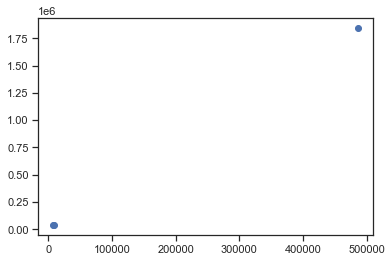

In [138]:
plt.scatter(x=top3_Country.Quantity,y=top3_Country.UnitPrice)

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [139]:
company_data = pd.read_csv("D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/2. Basic Data Manipulation - Visualization Exercise/Exercise Data Files/FMCG_Company_Data_2019.csv")

### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

Text(0, 0.5, 'Total Revenue')

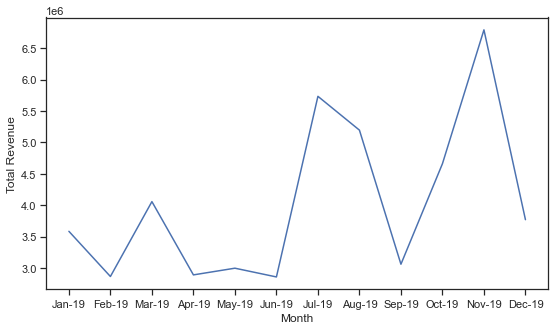

In [140]:
plt.figure(figsize=(9,5))


plt.plot(company_data.Month,company_data.Total_Revenue)
plt.xlabel('Month')
plt.ylabel('Total Revenue')

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

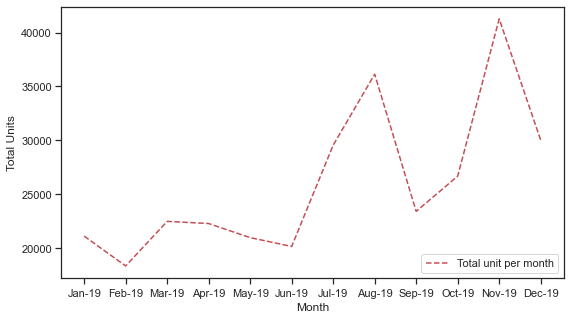

In [141]:
plt.figure(figsize=(9,5))


plt.plot(company_data.Month,company_data.Total_Units,color='r',linestyle='--',label = 'Total unit per month')
plt.xlabel('Month')
plt.ylabel('Total Units')
plt.legend(loc='lower right')

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

Text(0.5, 1.0, 'Sales data')

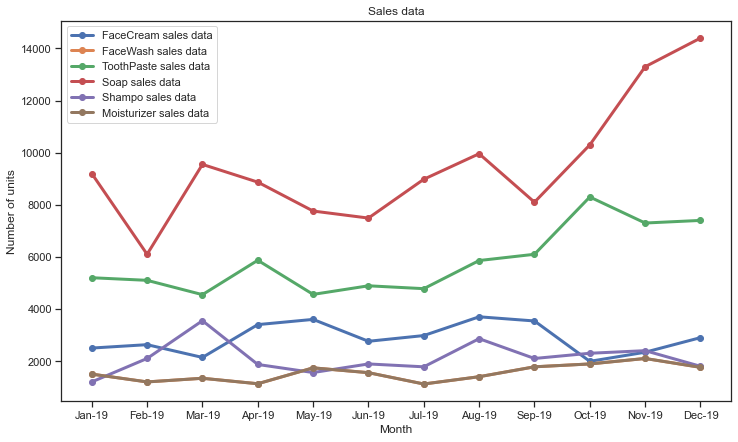

In [142]:
plt.figure(figsize=(12,7))

plt.plot(company_data.Month, company_data.FaceCream, label = 'FaceCream sales data', marker='o',linewidth=3)
plt.plot(company_data.Month, company_data.FaceWash, label = 'FaceWash sales data', marker='o', linewidth=3)
plt.plot(company_data.Month, company_data.ToothPaste, label = 'ToothPaste sales data',marker='o',linewidth=3)
plt.plot(company_data.Month, company_data.Soap, label = 'Soap sales data',marker='o',linewidth=3)
plt.plot(company_data.Month, company_data.Shampo, label = 'Shampo sales data', marker='o',linewidth=3)
plt.plot(company_data.Month, company_data.Moisturizer, label = 'Moisturizer sales data',marker='o',linewidth=3)

plt.xlabel('Month')
plt.ylabel('Number of units')
plt.legend(loc = 'upper left')
plt.title('Sales data')

### 85. Create Bar Chart for soap of all months and Save the chart in folder

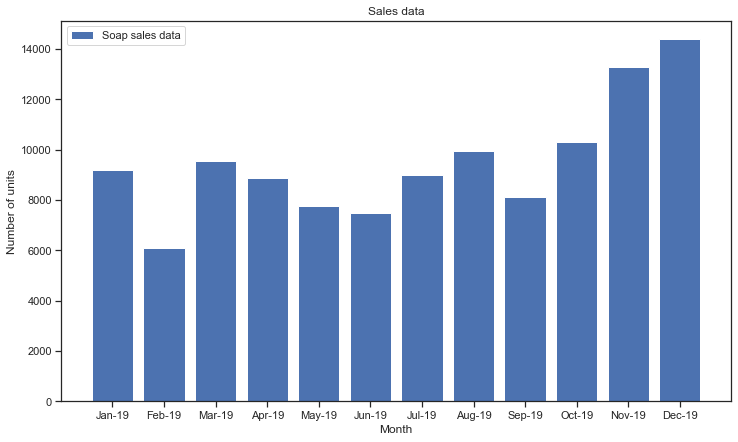

In [143]:
plt.figure(figsize=(12,7))

plt.bar(company_data.Month, company_data.Soap, label = 'Soap sales data')

plt.xlabel('Month')
plt.ylabel('Number of units')
plt.legend(loc = 'upper left')
plt.title('Sales data')

plt.savefig('Soap sales data.png')

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

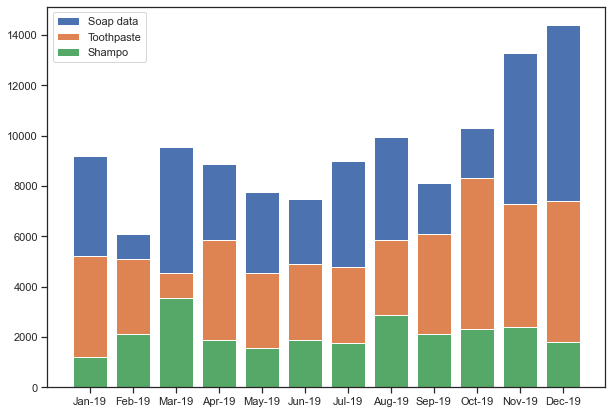

In [144]:
plt.figure(figsize=(10,7))

plt.bar(company_data.Month, company_data.Soap, label='Soap data')
plt.bar(company_data.Month, company_data.ToothPaste, label='Toothpaste')
plt.bar(company_data.Month, company_data.Shampo, label='Shampo')

plt.legend(loc='upper left')

### 87. Create Histogram for Total Revenue

<AxesSubplot:ylabel='Frequency'>

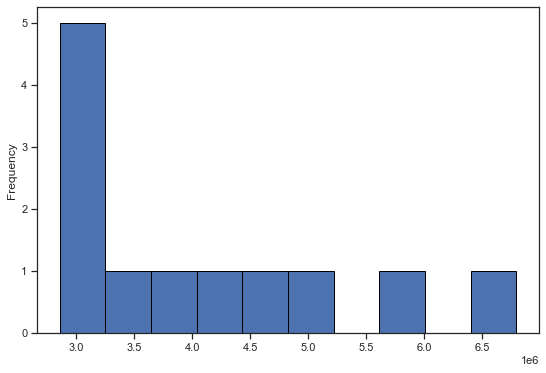

In [145]:
company_data.Total_Revenue.plot(kind='hist', edgecolor='black', figsize=(9,6))

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

In [146]:
#company_data.sum()
product_quantity = company_data.loc[:,['FaceCream','FaceWash','ToothPaste','Soap','Shampo','Moisturizer']].sum()

Text(0, 0.5, '')

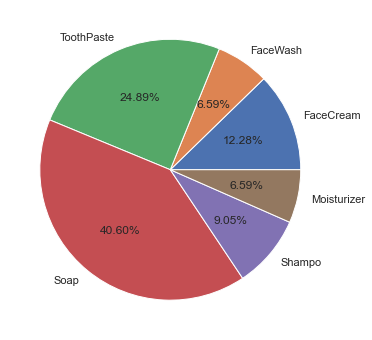

In [147]:
product_quantity.plot(kind='pie', subplots=True, legend=False, autopct = '%.2f%%',figsize=(6,6))
plt.ylabel('')

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

Text(0.5, 1.0, 'FaceWash')

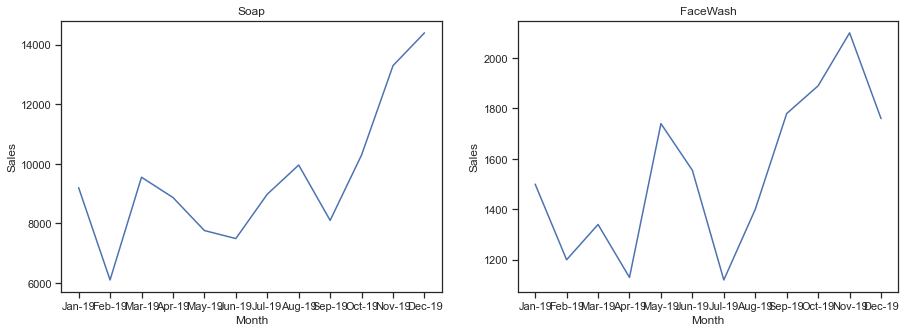

In [148]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(company_data.Month,company_data.Soap)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title('Soap')

plt.subplot(1,2,2)
plt.plot(company_data.Month,company_data.FaceWash)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title('FaceWash')

### 90. Create Box Plot for Total Profit variable

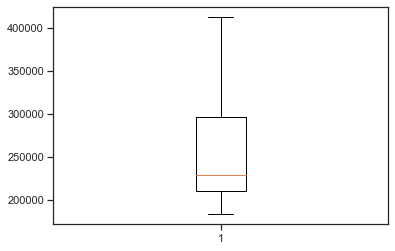

In [149]:
plt.boxplot(company_data.Total_Profit)
plt.show()